In [32]:
import time
import plotnine as p9
import pandas as pd
from tqdm import tqdm

In [33]:
# use common recursive strategy.
def f(n):
    # n is an integer, and n >= 1
    if n == 1 or n == 2:
        return 1
    return f(n-1) + f(n-2) 

In [34]:
# use time.perf_counter() to compare the performance.
def timing_perf_counter(function, *args, n=3):
    times = []
    for i in range(n):
        start = time.perf_counter()
        function(*args)
        end = time.perf_counter()
        times.append(end - start)
    return min(times)








  0%|          | 0/999 [27:13<?, ?it/s]


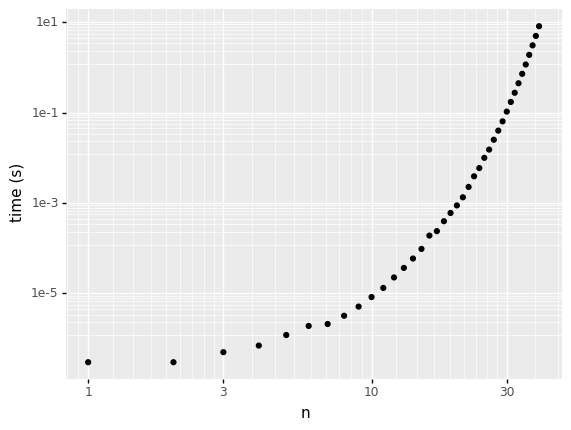

<ggplot: (121151156616)>

In [35]:
# draw the figure of common recursive strategy.
ns = range(1, 40)
times = [timing_perf_counter(f,n) for n in tqdm(ns)]
(
    p9.ggplot(pd.DataFrame({'n': ns, 'time (s)': times}),p9.aes(x='n', y = 'time (s)'))+
    p9.geom_point()+
    p9.scale_x_continuous(trans='log10')+
    p9.scale_y_continuous(trans='log10'))

In [36]:
from functools import lru_cache

In [37]:
# use lru_cache() and recursive strategy.
@lru_cache()
def f_lru(n):
    # n is an integer, and n >= 1
    if n == 1 or n == 2:
        return 1
    return f_lru(n-1) + f_lru(n-2)

100%|██████████| 9999/9999 [00:00<00:00, 624796.58it/s]


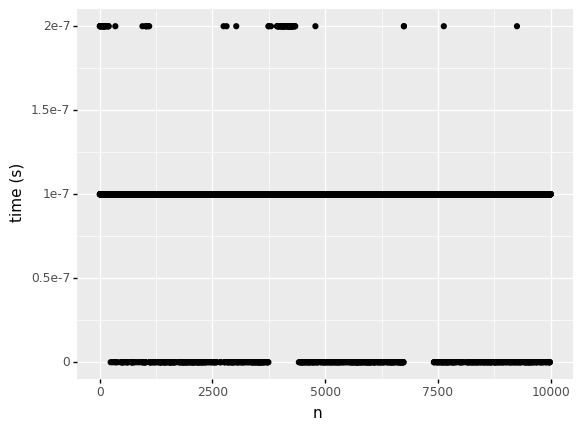

<ggplot: (121203033360)>

In [38]:
# draw the figure of recursive strategy using lru_cache.                                                  
ns = range(1, 10000)
times = [timing_perf_counter(f_lru,n) for n in tqdm(ns)]
(p9.ggplot(pd.DataFrame({'n': ns, 'time (s)': times}),p9.aes(x='n', y = 'time (s)'))+
p9.geom_point()
)

In [39]:
# use time.time() to compare the performance.
def timing_time(function, *args, n=3):
    times = []
    for i in range(n):
        start = time.time()
        function(*args)
        end = time.time()
        times.append(end - start)
    return min(times)

100%|██████████| 39/39 [01:03<00:00,  1.64s/it]
D:\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10


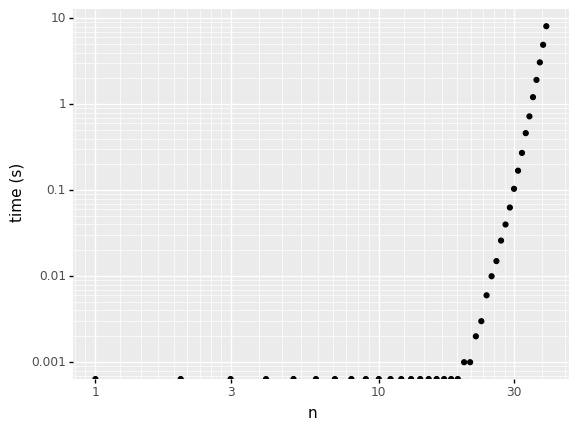

<ggplot: (121121899984)>

In [40]:
# also draw the figures.
ns = range(1, 40)
times = [timing_time(f,n) for n in tqdm(ns)]
(
    p9.ggplot(pd.DataFrame({'n': ns, 'time (s)': times}),p9.aes(x='n', y = 'time (s)'))+
    p9.geom_point()+
    p9.scale_x_continuous(trans='log10')+
    p9.scale_y_continuous(trans='log10'))


100%|██████████| 9999/9999 [00:00<00:00, 655704.28it/s]


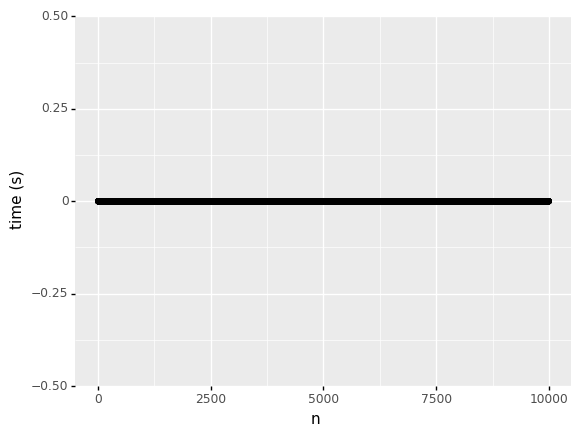

<ggplot: (121124963949)>

In [41]:
ns = range(1, 10000)
times = [timing_time(f_lru,n) for n in tqdm(ns)]
(p9.ggplot(pd.DataFrame({'n': ns, 'time (s)': times}),p9.aes(x='n', y = 'time (s)'))+
p9.geom_point()
)
